# Plot daily speed

Following up on Navid's post
https://climatefluidphysics.slack.com/archives/C0104HQ8K50/p1733257081747879

He gets these weird lines with daily speed from `01deg_jra55v150_iaf_cycle1`
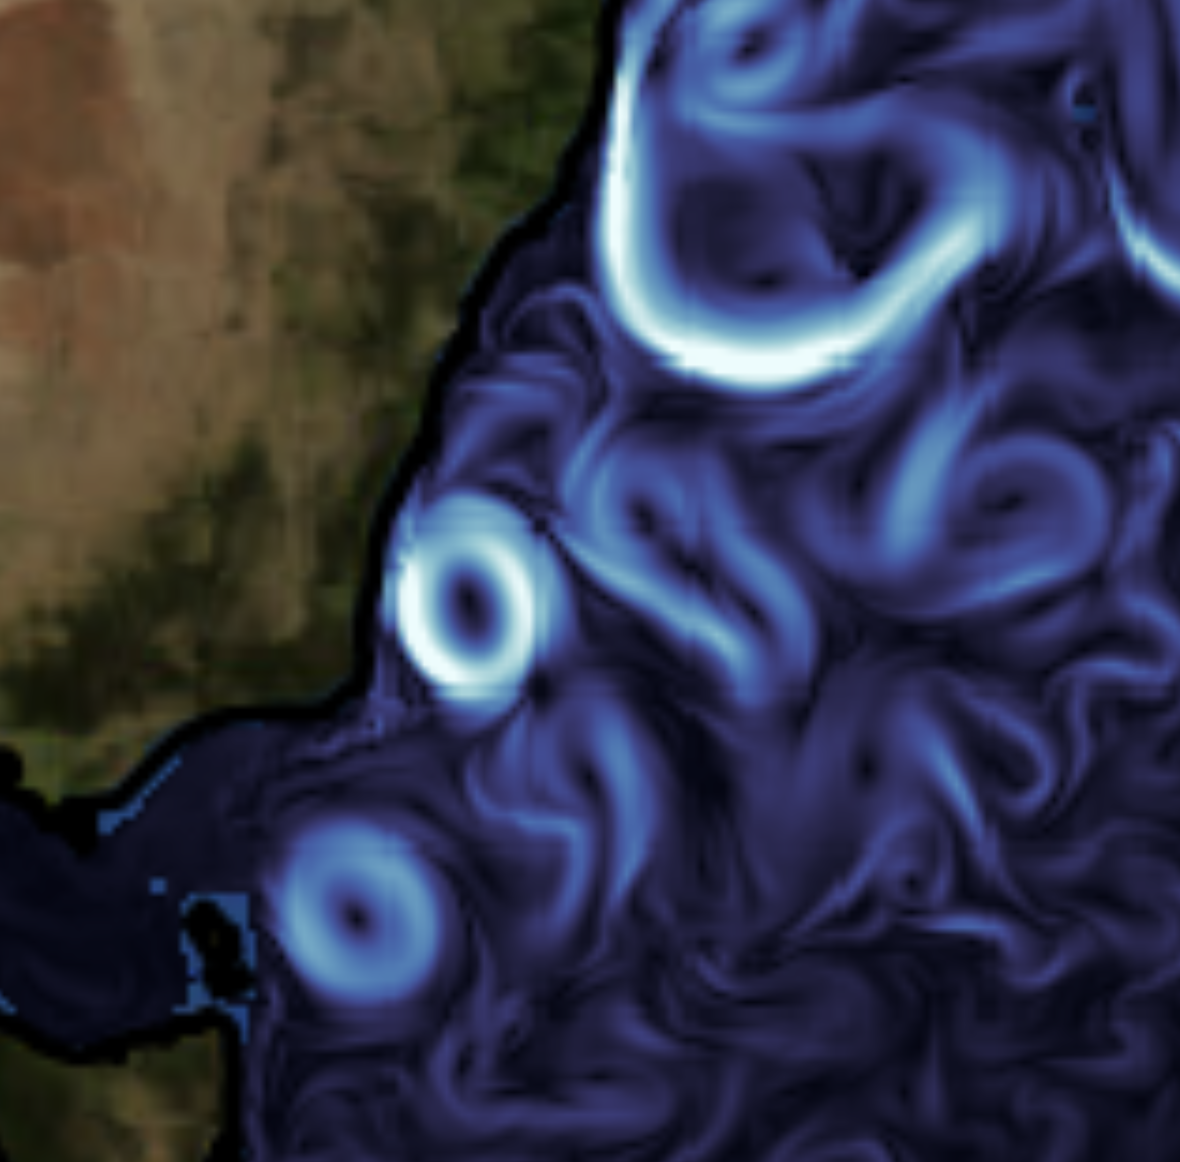

In [1]:
import cosima_cookbook as cc
import dask.array as da
import xarray as xr
import numpy as np
import glob
import os.path
import warnings
import matplotlib.pyplot as plt

In [2]:
import climtas.nci
climtas.nci.GadiClient(malloc_trim_threshold='64kib')

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 14
Total threads: 14,Total memory: 63.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34457,Workers: 14
Dashboard: /proxy/8787/status,Total threads: 14
Started: Just now,Total memory: 63.00 GiB
Comm: tcp://127.0.0.1:39023,Total threads: 1
Dashboard: /proxy/46435/status,Memory: 4.50 GiB
Nanny: tcp://127.0.0.1:45935,


In [3]:
session = cc.database.create_session()

In [4]:
u = cc.querying.getvar(expt='01deg_jra55v150_iaf_cycle1', variable='u', 
                          session=session, frequency='1 daily',
                          attrs={'cell_methods': 'time: mean'},
                          n=-1).isel(time=1)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


In [5]:
v = cc.querying.getvar(expt='01deg_jra55v150_iaf_cycle1', variable='v', 
                          session=session, frequency='1 daily',
                          attrs={'cell_methods': 'time: mean'},
                          n=-1).isel(time=1)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


In [6]:
speed = np.sqrt(u**2 + v**2).sel(st_ocean=37, method='nearest').sel(xu_ocean=slice(-213, -200)).sel(yu_ocean=slice(-42, -30))

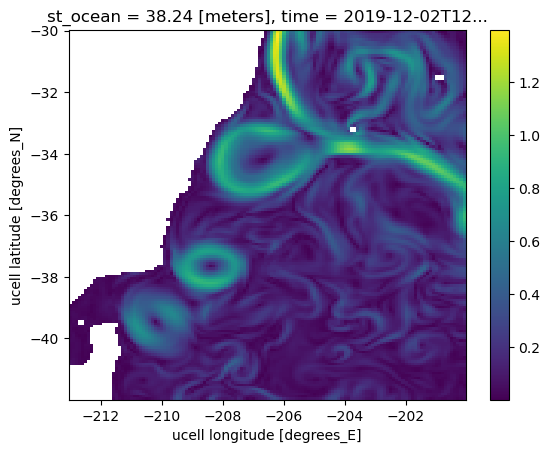

In [7]:
speed.plot()

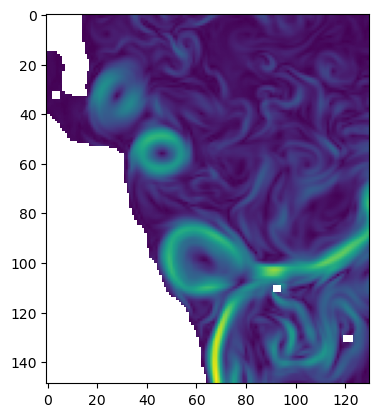

In [8]:
plt.imshow(speed)